# Movie demos

In [15]:
import os
import logging
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Ellipse
from IPython.display import HTML
from matplotlib import rcParams
from numpy.linalg import norm
from numpy import degrees
from copy import deepcopy

In [2]:
from pNeuma_simulator import params
from pNeuma_simulator.results import loader

In [ ]:
warnings.filterwarnings("ignore")
rcParams["animation.embed_limit"] = 2**128
rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": "Helvetica",
        "mathtext.fontset": "stixsans",
        "mathtext.default": "regular",
        "font.size": 7,
        "axes.titlesize": 7,
        "xtick.labelsize": 6,
        "ytick.labelsize": 6,
        "axes.linewidth": 0.25,
        "xtick.major.width": 0.25,
        "ytick.major.width": 0.25,
        "xtick.minor.width": 0.25,
        "ytick.minor.width": 0.25,
    }
)
logging.getLogger("matplotlib.font_manager").disabled = True

## Animations

In [4]:
non_empty = []
empty = []
items = None
n_cars = 12  # 8
n_moto = 6  # 8
permutation = (n_cars, n_moto)
n_cars, n_moto = permutation
load = True
if load:
    items = loader(permutation, path="./output/")
for item in items:
    if isinstance(item[0], list):
        non_empty.append(item)
    else:
        empty.append(item)
len(non_empty)

(12, 6).json


256

In [5]:
ind = 100
item = non_empty[ind]

In [6]:
def draw(agent, ax):
    """Add this Particle's Ellipse patch to the Matplotlib Axes ax."""
    if agent["mode"] == "Car":
        width = 2 * params.car_l
        height = 2 * params.car_w
    else:
        width = 2 * params.moto_l
        height = 2 * params.moto_w
    ellipse = Ellipse(
        xy=agent["pos"],
        width=width,
        height=height,
        angle=degrees(agent["theta"]),
        **{"ec": "k", "fc": "w"},
    )
    ax.add_patch(ellipse)
    ax.scatter(
        agent["pos"][0],
        agent["pos"][1],
        marker="o",
        fc="k",
        ec="none",
        s=5,
    )
    if norm(agent["vel"]) > 0:
        ax.arrow(
            agent["pos"][0],
            agent["pos"][1],
            agent["vel"][0],
            agent["vel"][1],
            antialiased=True,
            width=0.1,
            head_width=0.5,
            head_length=0.75,
            color="k",
            zorder=2,
        )

In [7]:
def ring(t, l_agents, ax):
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-params.L / 2, params.L / 2)
    ax.set_ylim(-params.lane, params.lane)
    ax.set_axis_off()
    ax.hlines(
        [-params.lane, params.lane],
        xmin=-params.L / 2,
        xmax=params.L / 2,
        color="k",
        ls="-",
        lw=3,
    )
    for agent in l_agents[t]:
        if agent["pos"][0] < params.d_max:
            image = deepcopy(agent)
            image["pos"][0] += params.L
            draw(image, ax)
        elif agent["pos"][0] > params.d_max:
            image = deepcopy(agent)
            image["pos"][0] -= params.L
            draw(image, ax)
        draw(agent, ax)

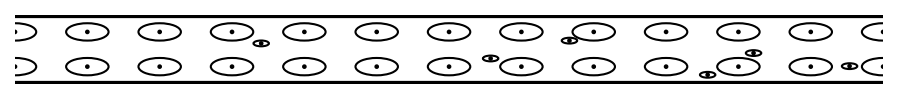

In [8]:
fig, ax = plt.subplots(figsize=(14.7 * params.cm, 2.5 * params.cm), dpi=150)
fig.tight_layout(pad=0)
ax.set_aspect("equal")


def animate_ring(i, ax=ax, fig=fig):
    fig.tight_layout(pad=0)
    ax.clear()
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-params.L / 2, params.L / 2)
    ax.set_ylim(-params.lane, params.lane)
    ax.set_axis_off()
    ring(i, item[0], ax)


# Create the animation
ani_ring = animation.FuncAnimation(fig, animate_ring, frames=range(0, len(item[0]), 1))

In [11]:
# Save the animation as an HTML video
ani_ring_html = ani_ring.to_jshtml()

In [17]:
# Display the HTML video
# HTML(ani_ring_html)

In [ ]:
path = "./output/movies/"
os.makedirs(path, exist_ok=True)
file = rf"{path}demo.gif"
writergif = animation.PillowWriter(fps=1 / params.dt)
ani_ring.save(file, writer=writergif)

In [ ]:
def navi(t, l_agents, ID, ax):
    a_des = l_agents[t][ID - 1]["a_des"]
    a0 = l_agents[t][ID - 1]["a0"]
    alphas = l_agents[t][ID - 1]["alphas"]
    f_a = l_agents[t][ID - 1]["f_a"]
    ax.invert_xaxis()
    ax.set_yticks([])
    ax.plot(np.degrees(alphas), f_a, c="k", clip_on=False)
    ax.scatter(np.degrees(a_des), 0, clip_on=False, marker="+", c="k")
    ax.spines["left"].set_position("zero")
    ax.set_xlabel("Direction $α$ ($\deg$)")
    ax.axhline(params.d_max, color="k", ls="--")
    ax.axvline(np.degrees(a0), color="k", ls=":")
    ax.text(np.degrees(a0) + 2, params.d_max + 0.5, "$α_0$")
    ax.set_ylim(0, params.d_max)
    ax.spines[["top", "right"]].set_visible(False)

In [ ]:
ID = 2 * n_cars + n_moto
ID

In [ ]:
fig, ax = plt.subplots(figsize=(6 * params.cm, 5 * params.cm), dpi=150)
fig.tight_layout(pad=0)
# frame = 1
# if frame < COUNT -1:
#    frame += 1
# else:
#    frame = 1
frame = -1
navi(frame, item[0], ID, ax)

In [ ]:
fig, ax = plt.subplots(figsize=(6 * params.cm, 5 * params.cm), dpi=150)


def animate_navi(i, ax=ax):
    ax.clear()
    ax = navi(i, item[0], ID, ax)


# Create the animation
ani_navi = animation.FuncAnimation(fig, animate_navi, frames=range(1, len(item[0]), 1))

In [ ]:
# Save the animation as an HTML video
ani_navi_html = ani_navi.to_jshtml()

In [ ]:
f = r"navi.gif"
writergif = animation.PillowWriter(fps=1 / params.dt)
ani_navi.save(f, writer=writergif)